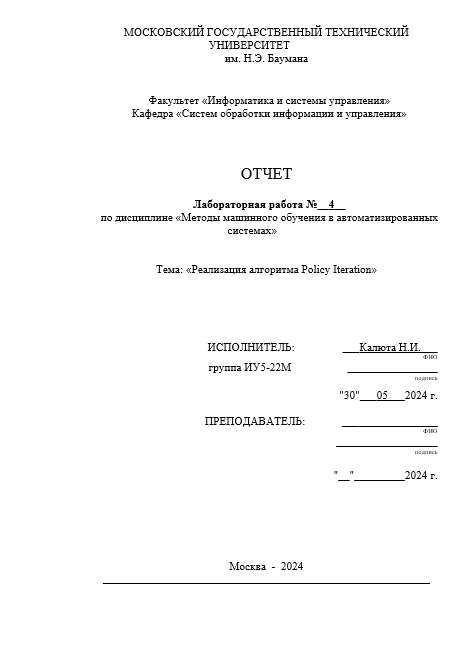

###**Цель лабораторной работы:**
Ознакомление с базовыми методами обучения с подкреплением.

###**Задание:**
<ol>
<li>На основе рассмотренного на лекции примера реализуйте алгоритм Policy Iteration для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).
</li>

###**Ход выполнения задания**

---



## Установка зависимостей

Установка необходимых библиотек и зависимостей для работы с Atari-играми

In [1]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!apt-get update > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

!pip install swig==4.1.1
!pip install Box2D==2.3.2
!pip install box2d-kengz==2.3.3
!pip install pygame==2.2.0
!pip install ale_py==0.8.1
!pip install pyglet==1.5.11


!pip install -U colabgymrender
!pip install imageio==2.4.1
!pip install --upgrade AutoROM
!AutoROM --accept-license
!pip install gymnasium[atari]==0.28.1

!wget http://www.atarimania.com/roms/Roms.rar
!unrar x -o+ /content/Roms.rar >/dev/nul
!python -m atari_py.import_roms /content/ROMS >/dev/nul

!pip install pyvirtualdisplay > /dev/null 2>&1

!pip install --upgrade gym

  Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.9/427.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Box2D: filename=Box2D-2.3.2-cp310-cp310-linux_x86_64.whl size=2391312 sha256=84654540f0219bc797d13bf0b9449a8c828151054323b57ad975f8ec403e7622
  Stored in directory: /root/.cache/pip/wheels/eb/cb/be/e663f3ce9aba6580611c0febaf7cd3cf7603f87047de2a52f9
Successfully built Box2D
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.4/425.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-kengz: filename=Box2D_kengz-2.3.3-cp310-cp310-linux_x86_64.whl size=2391302 sha256=15810e34cc54bde77d154d3f7c13e3b860164e65b580c62b0de2b8521db6d472
  Stored in directory: /root/.cache/pip/wheels/ab/a3/5f/6396406aa0163da86c2a8d28304a120b55cfa98363654d853b
Successfully built box2d-kengz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 50.1 MB/s e

Установка библиотек, необходимые для работы с графикой и видео

In [ ]:
!apt-get install xvfb
!apt-get install python3-opengl ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 47 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

Создать папку с названием "video"

In [ ]:
!mkdir -p video

## Импорт библиотек

In [ ]:
import gymnasium as gym
from gymnasium import logger as gymlogger
from gymnasium.wrappers.record_video import RecordVideo

gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from tqdm import tqdm
import math
import uuid
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

## Дополнительные функции

Функции для работы с видеозаписями, создает среду Gym с возможностью записи видео и выводит информацию о среде

In [ ]:
def show_video(folder_name):
  mp4list = glob.glob(f'{folder_name}/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env, folder_name):
  env = RecordVideo(env, folder_name, step_trigger = lambda episode_number: True)
  return env

def create_environment(name):
    folder_name = f"./video/{name}/{uuid.uuid4()}"
    env = wrap_env(gym.make(name, render_mode="rgb_array"), folder_name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Nondeterministic: {spec.nondeterministic}")
    print(f"Reward Range: {env.reward_range}")
    print(f"Reward Threshold: {spec.reward_threshold}")
    return env, folder_name

## Создание агентов

 Позволяет агенту взаимодействовать со средой CliffWalking-v0, выполнять действия, определенные политикой, и записывать видео

In [ ]:
class PolicyIterationAgent:
    '''
    Класс, эмулирующий работу агента
    '''
    def __init__(self, env):
        self.env = env
        # Пространство состояний
        self.observation_dim = 48
        # Массив действий в соответствии с документацией
        # https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
        self.actions_variants = np.array([0,1,2,3])
        # Задание стратегии (политики)
        # Карта 4х4 и 4 возможных действия
        self.policy_probs = np.full((self.observation_dim, len(self.actions_variants)), 0.25)
        # Начальные значения для v(s)
        self.state_values = np.zeros(shape=(self.observation_dim))
        # Начальные значения параметров
        self.maxNumberOfIterations = 1000
        self.theta=1e-6
        self.gamma=0.99


    def print_policy(self):
        '''
        Вывод матриц стратегии
        '''
        print('Стратегия:')
        pprint(self.policy_probs)


    def policy_evaluation(self):
        '''
        Оценивание стратегии
        '''
        # Предыдущее значение функции ценности
        valueFunctionVector = self.state_values
        for iterations in range(self.maxNumberOfIterations):
            # Новое значение функции ценности
            valueFunctionVectorNextIteration=np.zeros(shape=(self.observation_dim))
            # Цикл по состояниям
            for state in range(self.observation_dim):
                # Вероятности действий
                action_probabilities = self.policy_probs[state]
                # Цикл по действиям
                outerSum=0
                for action, prob in enumerate(action_probabilities):
                    innerSum=0
                    # Цикл по вероятностям действий
                    for probability, next_state, reward, isTerminalState in self.env.P[state][action]:
                        innerSum=innerSum+probability*(reward+self.gamma*self.state_values[next_state])
                    outerSum=outerSum+self.policy_probs[state][action]*innerSum
                valueFunctionVectorNextIteration[state]=outerSum
            if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<self.theta):
                # Проверка сходимости алгоритма
                valueFunctionVector=valueFunctionVectorNextIteration
                break
            valueFunctionVector=valueFunctionVectorNextIteration
        return valueFunctionVector


    def policy_improvement(self):
        '''
        Улучшение стратегии
        '''
        qvaluesMatrix=np.zeros((self.observation_dim, len(self.actions_variants)))
        improvedPolicy=np.zeros((self.observation_dim, len(self.actions_variants)))
        # Цикл по состояниям
        for state in range(self.observation_dim):
            for action in range(len(self.actions_variants)):
                for probability, next_state, reward, isTerminalState in self.env.P[state][action]:
                    qvaluesMatrix[state,action]=qvaluesMatrix[state,action]+probability*(reward+self.gamma*self.state_values[next_state])

            # Находим лучшие индексы
            bestActionIndex=np.where(qvaluesMatrix[state,:]==np.max(qvaluesMatrix[state,:]))
            # Обновление стратегии
            improvedPolicy[state,bestActionIndex]=1/np.size(bestActionIndex)
        return improvedPolicy


    def policy_iteration(self, cnt):
        '''
        Основная реализация алгоритма
        '''
        policy_stable = False
        for i in tqdm(range(1, cnt+1)):
            self.state_values = self.policy_evaluation()
            self.policy_probs = self.policy_improvement()
        print(f'Алгоритм выполнился за {i} шагов.')


def play_agent(agent):
    env2, folder = create_environment('CliffWalking-v0')
    state = env2.reset()[0]
    done = False
    while not done:
        p = agent.policy_probs[state]
        if isinstance(p, np.ndarray):
            action = np.random.choice(len(agent.actions_variants), p=p)
        else:
            action = p
        next_state, reward, terminated, truncated, _ = env2.step(action)

        state = next_state
        if terminated or truncated:
            done = True
    env2.close()
    show_video(folder)

Установка виртуального дисплея

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

## Среда обучения

В качестве среды обучения с подкреплением был выбран Toy Text / Cliff Walking из библиотеки Gym.

### Описание

Плата представляет собой матрицу 4x12 с (с использованием индексации матрицы NumPy):

[3, 0] как начало слева внизу

[3, 11] как цель внизу справа

[3, 1..10] в виде скалы внизу в центре.

Если агент наступит на скалу, он вернется к началу. Эпизод заканчивается, когда агент достигает цели.

### Действия
Существует 4 дискретных детерминированных действия:

0: двигаться вверх

1: двигаться вправо

2: двигаться вниз

3: двигаться влево

### Наблюдения
Возможных состояний 3x12 + 1. На самом деле агент не может находиться ни у обрыва, ни у ворот (поскольку это приводит к концу эпизода). Остаются все позиции первых трех строк плюс нижняя левая ячейка. Наблюдение — это просто текущая позиция, закодированная как сглаженный индекс .

### Награда
Каждый временной шаг приносит -1 награду, а шаг в скалу - -100 награды.

## Обучение агента

Обучает агента, который должен научиться двигаться по сетке, избегая обрыва, с помощью алгоритма Policy Iteration

In [ ]:
# Создание среды
env = gym.make('CliffWalking-v0')
env.reset()
# Обучение агента
agent = PolicyIterationAgent(env)
agent.print_policy()
agent.policy_iteration(1000)
agent.print_policy()

Стратегия:
array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],

100%|██████████| 1000/1000 [00:05<00:00, 198.24it/s]

Алгоритм выполнился за 1000 шагов.
Стратегия:
array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.33333333, 0.33333333

Запуск обученного агента в среде CliffWalking-v0, демонстрируя его способность успешно пройти по сетке, избегая обрыва,  и сохраняет видеозапись его действий

In [ ]:
play_agent(agent)

Action Space: Discrete(4)
Observation Space: Discrete(48)
Max Episode Steps: None
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None
Moviepy - Building video /content/video/CliffWalking-v0/5c92195c-d99c-492d-9228-32d8403ca768/rl-video-step-0.mp4.
Moviepy - Writing video /content/video/CliffWalking-v0/5c92195c-d99c-492d-9228-32d8403ca768/rl-video-step-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/CliffWalking-v0/5c92195c-d99c-492d-9228-32d8403ca768/rl-video-step-0.mp4


## Вывод

В ходе выполнения лабораторной работы я ознакомился с алгоритмом итерации политик, который является одним из ключевых методов обучения с подкреплением. Алгоритм  работает за счет поочередного оценивания и улучшения политики агента.

Оценивание политики: Алгоритм вычисляет значения для каждого состояния в среде, основываясь на текущей политике агента.
Улучшение политики: Используя полученные значения, алгоритм обновляет политику агента, выбирая действия, которые максимизируют ожидаемое вознаграждение.
Этот процесс повторяется до тех пор, пока политика не станет оптимальной, то есть агент будет выбирать действия, которые максимально повышают его шансы на получение максимальной награды.

Код, который я анализировал,  демонстрирует применение этого алгоритма к задаче CliffWalking. В этой задаче агент должен найти путь через сетку, избегая обрыва, который приводит к потере награды. Код успешно обучил агента решать эту задачу, используя алгоритм итерации политик.